# Data Analysis on Perturbation Runs

## Runs previously done

The below bash scripts have been run, and should exactlycorrespond to the data within `./data`

## Data Analysis for Run Data

In [5]:
%load_ext rpy2.ipython
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Lattice Graph, Randomized Perturbation

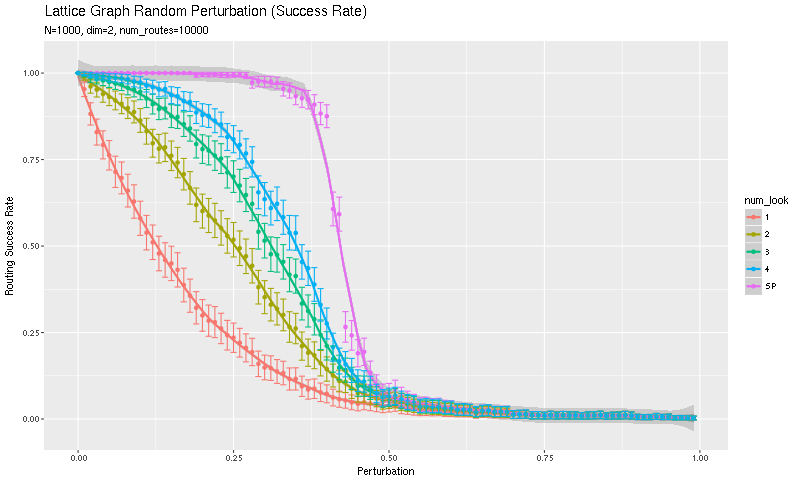

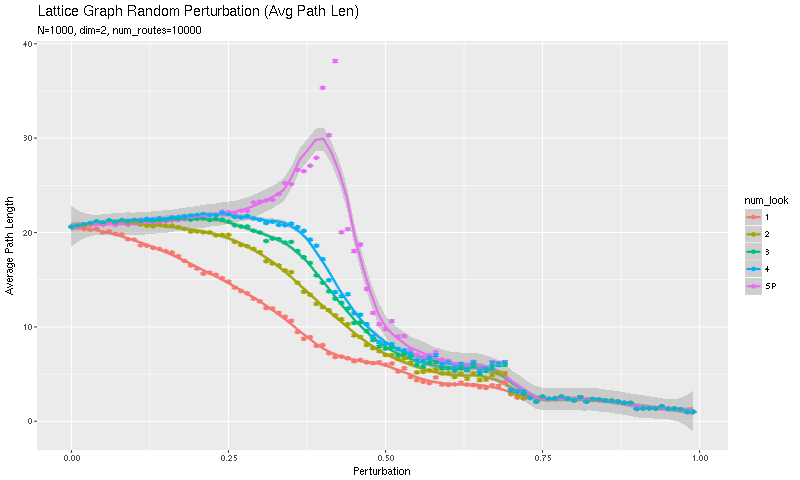

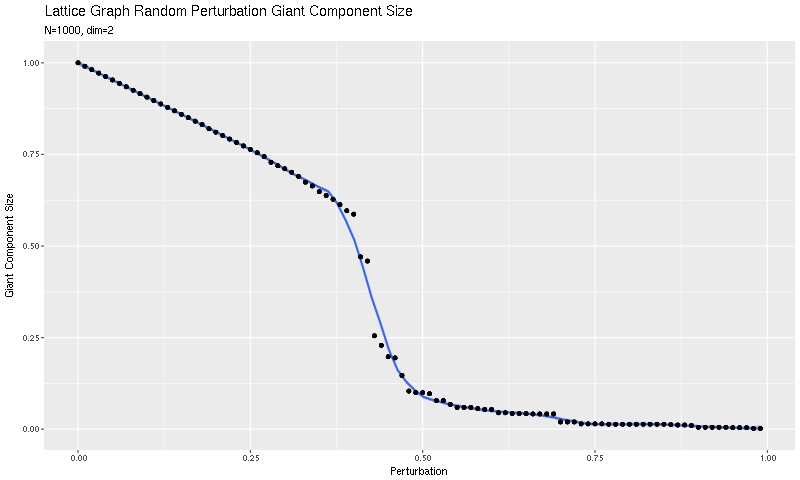

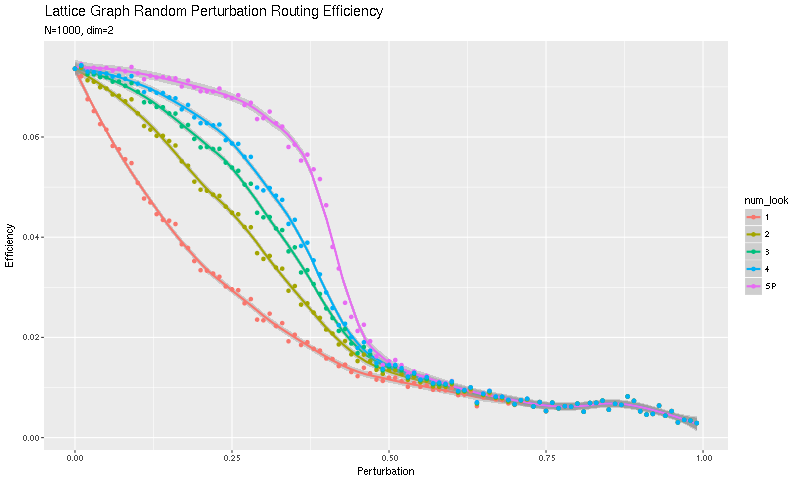

In [51]:
%%R -w 800

library(readr)

    df <- read_csv("./data/N_961_strat_random_STEP_0.01_graph_lattice_numroutes_10000_dim_2_k_50_numlookahead_5_rand_20123.csv")
df$num_look <- factor(df$num_look)
library(ggplot2)

print(ggplot(df, aes(x=f, y=succ_rate, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=succ_rate-succ_std, ymax=succ_rate+succ_std),
                  width=.01) + 
    labs(title="Lattice Graph Random Perturbation (Success Rate)",
         subtitle="N=1000, dim=2, num_routes=10000", x="Perturbation", y="Routing Success Rate"))

print(ggplot(df, aes(x=f, y=avg_len, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=avg_len-avg_std_dev, ymax=avg_len+avg_std_dev),
                  width=.01) + 
    labs(title="Lattice Graph Random Perturbation (Avg Path Len)", subtitle="N=1000, dim=2, num_routes=10000",
         x="Perturbation", y="Average Path Length"))

print(ggplot(df, aes(x=f, y=giant_comp_size)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Random Perturbation Giant Component Size", subtitle="N=1000, dim=2",
         x="Perturbation", y="Giant Component Size"))
    

ggplot(df, aes(x=f, y=avg_efficiency, color=num_look)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Random Perturbation Routing Efficiency", subtitle="N=1000, dim=2",
         x="Perturbation", y="Efficiency")

In [88]:
%%R
library(readr)
library(dplyr)
library(ggplot2)

plotPerturbation <- function(filename, dimension=30) {
    df_heat <- read_csv(filename, col_names=FALSE)
    colnames(df_heat) <- c("x","y", "i")
    for (ival in unique(df_heat$i)) {
        df_curr <- filter(df_heat, i == ival)
        print(ggplot(df_curr, aes(x, y)) + geom_tile(color="black", fill="red") + 
            theme_classic() +
            theme(panel.background = element_rect(fill="black")) + xlim(0,dimension) + ylim(0, dimension))
    }
}


In [89]:
%%R

df <- read_csv("./data/heatmap_N_400_strat_random_graph_lattice_STEP_0.01_SEED_29155.csv", col_names=FALSE)
colnames(df) <- c("x","y","i")
df_heat <- read_csv("./data/traffic_N_400_strat_random_graph_lattice_STEP_0.01_SEED_29155.csv", col_names=FALSE)
colnames(df_heat) <- c("x","y","amt","i", "num_lookahead")

In [221]:
%%R
dimension <- 20

df_new <- mutate(df, num_lookahead = "SP")
for (k in 1:5) {
    df2 <- mutate(df_new, num_lookahead=toString(k))
    df_new <-  rbind(df_new, df2)
}

df_heat_new <- left_join(df_new, df_heat, by=c("x","y","i", "num_lookahead"))

colors <- c("Blues", "Greens", "Oranges", "Purples", "Reds")

plots <- list()
j <- 0
for (numval in unique(df_heat$num_lookahead)) {
    i <- 0
    for (ival in unique(df_heat_new$i)) {
            df_curr <- filter(df_heat_new, i == ival, num_lookahead == numval)
            p1 <- ggplot(df_curr, aes(x, y, fill=amt)) + geom_tile(color="black") + 
                theme_classic() +
                theme(panel.background = element_rect(fill="black")) + 
                xlim(0,dimension) + ylim(0, dimension) +
                theme(axis.line=element_blank(),axis.text.x=element_blank(),
                  axis.text.y=element_blank(),axis.ticks=element_blank(),
                  axis.title.x=element_blank(),
                  axis.title.y=element_blank(),legend.position="") +
                scale_fill_distiller(palette=colors[j+1])
                

            num_perturbs <- length(unique(df_heat_new$i))
        
            plots[[i * num_perturbs + j + 1]] <- p1
        
            # Unused density plot for each perturbation + routing strategy 
            p2 <- ggplot(df_curr, aes(amt)) + geom_density(fill="blue", alpha=0.2, color="blue")
        
            i <- i + 1
        }
    j <- j + 1
}

In [227]:
%%R
library(ggpubr)
g <- ggarrange(plotlist=plots, ncol=5)

$`1`

$`3`

$`5`

$`7`

$`9`

$`11`

$`13`

$`15`

$`17`

$`19`



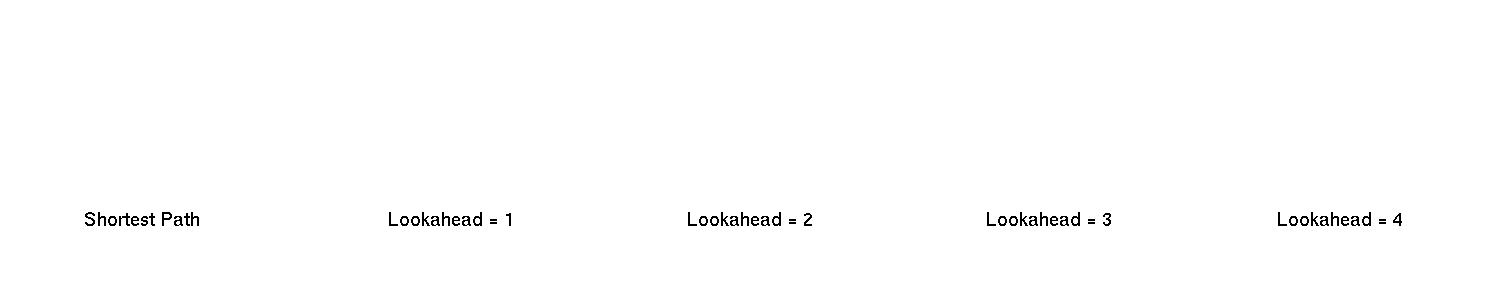

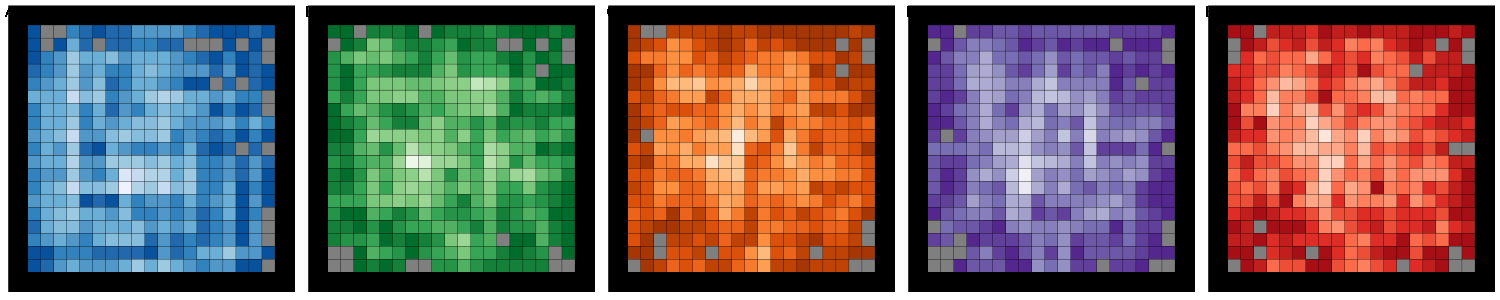

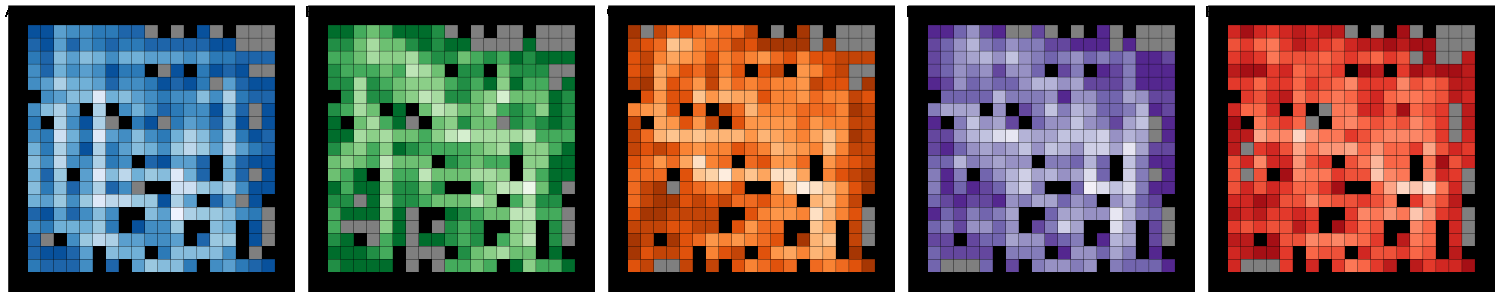

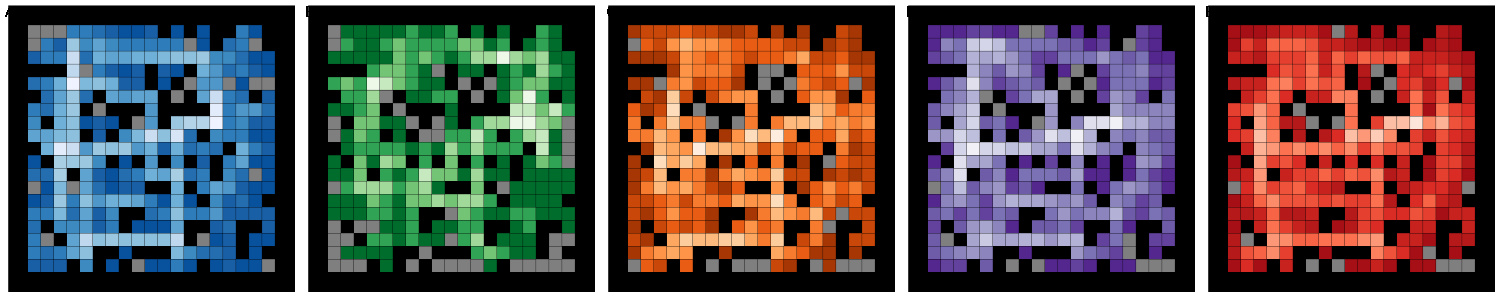

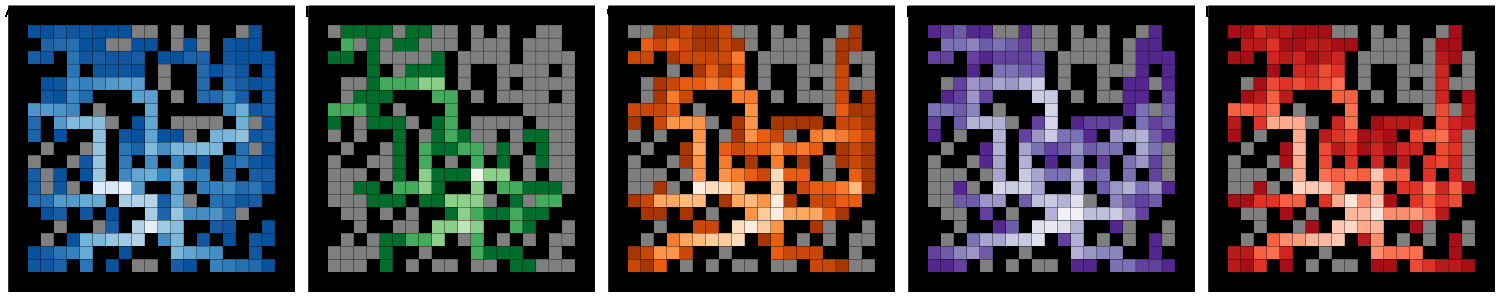

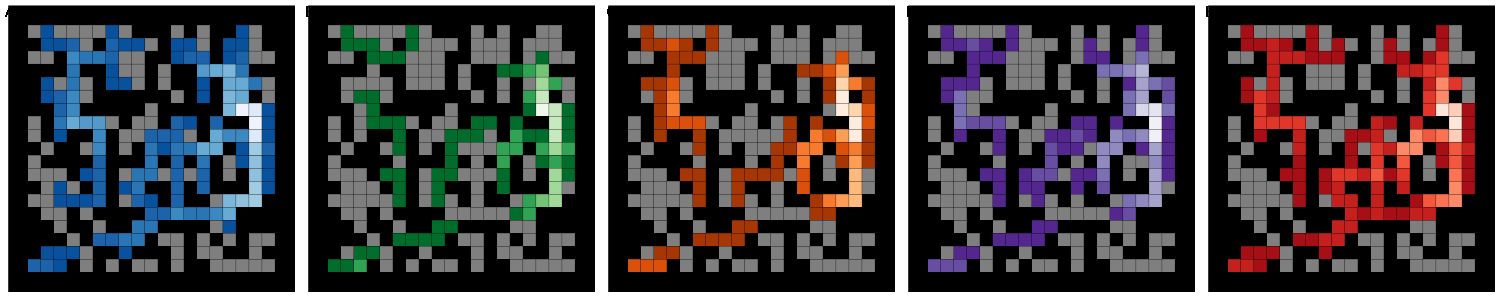

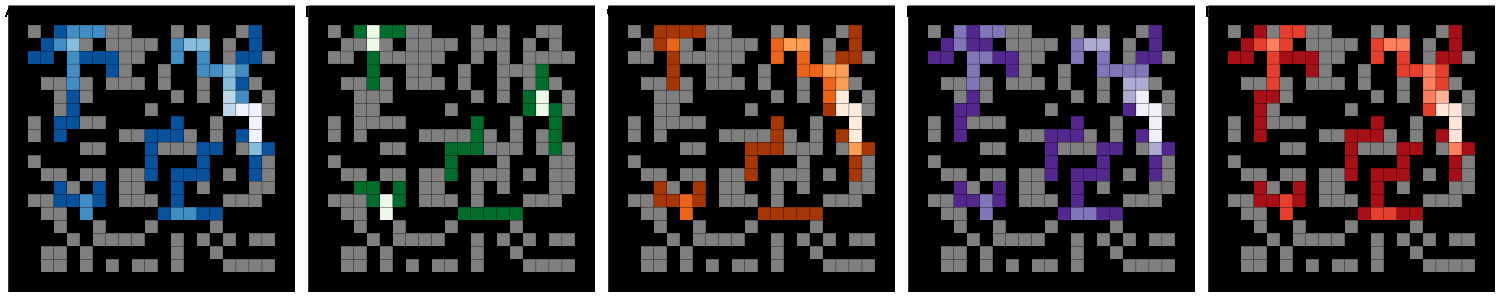

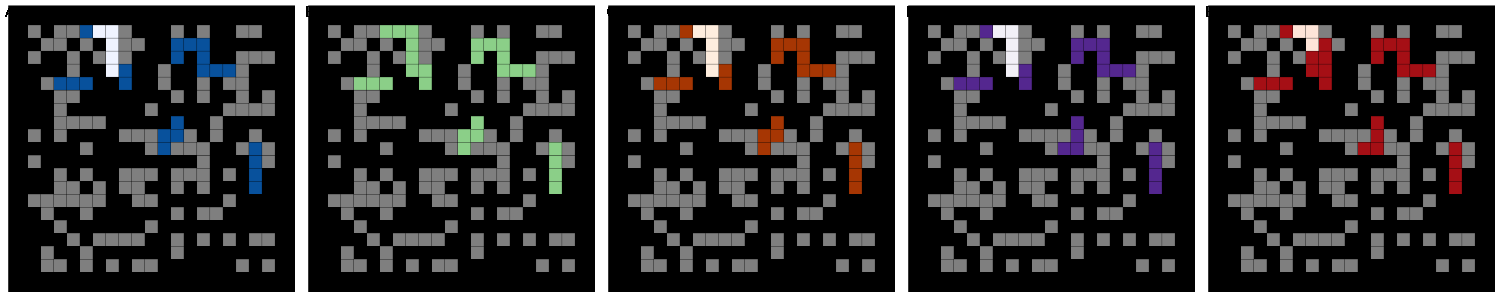

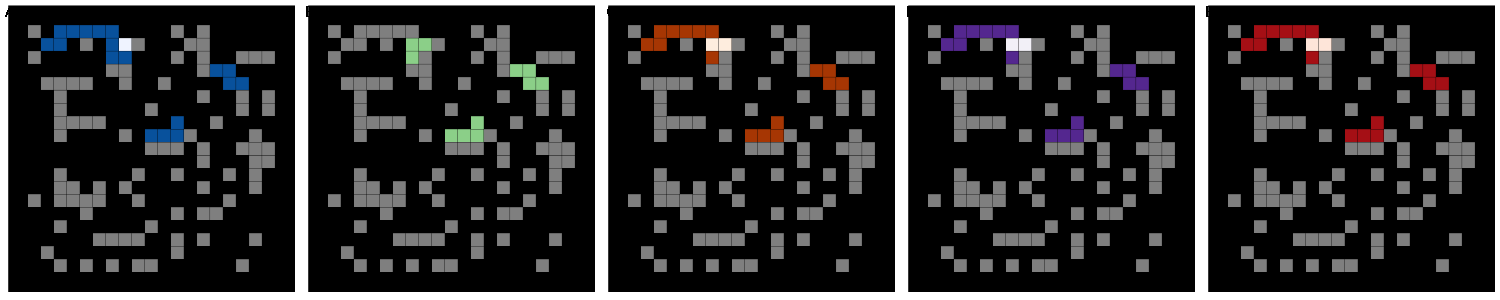

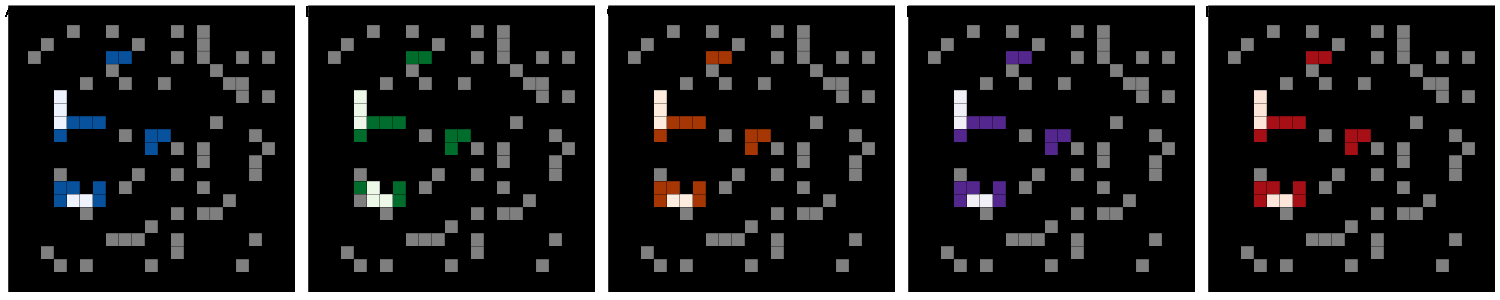

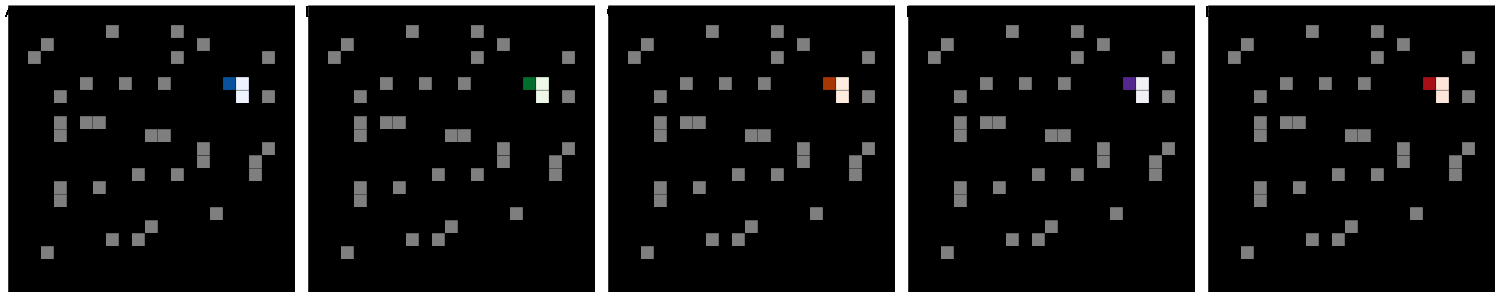

In [240]:
%%R -w 1500 -h 300
par(mar = c(0,0,0,0))

plot(c(0, 1), c(0, 2), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')

text(x = 0.0625, y = 0.5, paste("Shortest Path"), 
     cex = 1.6, col = "black")
text(x = 0.285, y = 0.5, paste("Lookahead = 1"), 
     cex = 1.6, col = "black")
text(x = 0.5, y = 0.5, paste("Lookahead = 2"), 
     cex = 1.6, col = "black")
text(x = 0.715, y = 0.5, paste("Lookahead = 3"), 
     cex = 1.6, col = "black")
text(x = 0.925, y = 0.5, paste("Lookahead = 4"), 
     cex = 1.6, col = "black")

for (i in seq(1,20,2)) {
    str_i <- toString(i)
    plot <- g[str_i]
    
    print(plot)
}

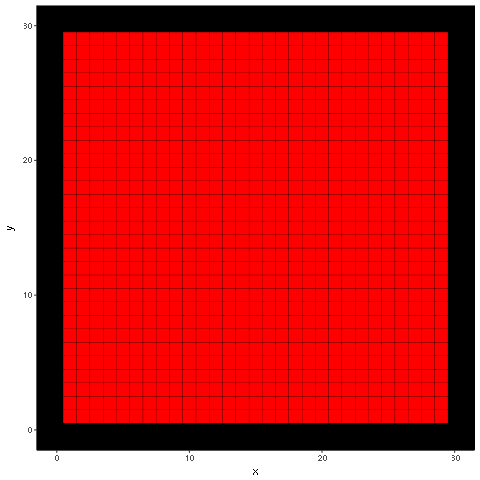

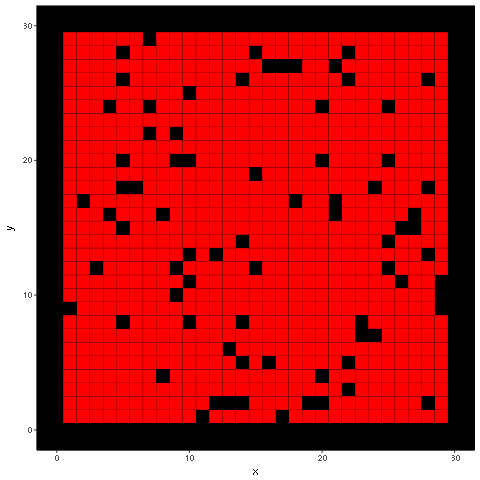

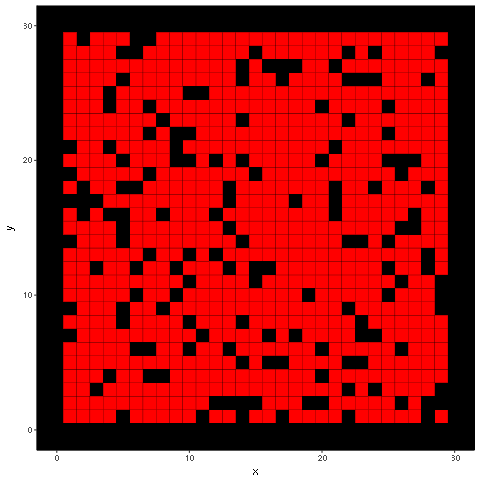

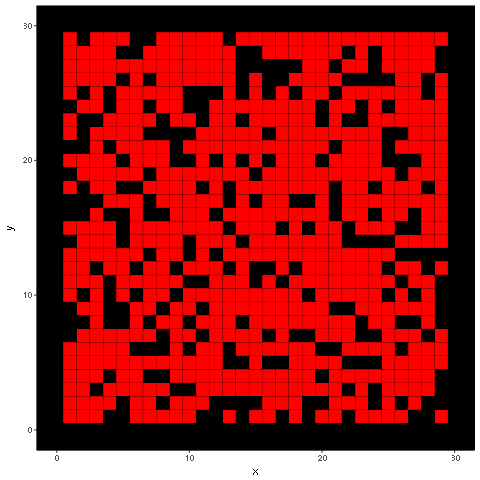

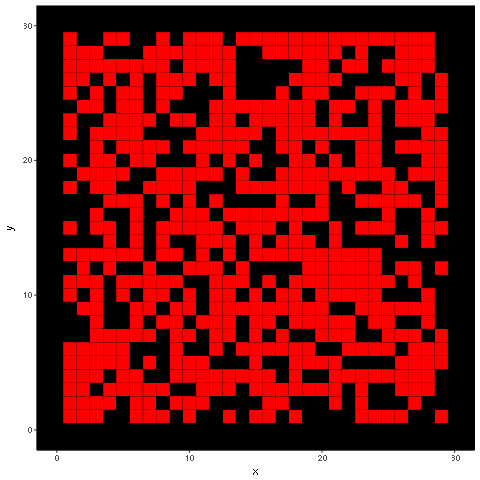

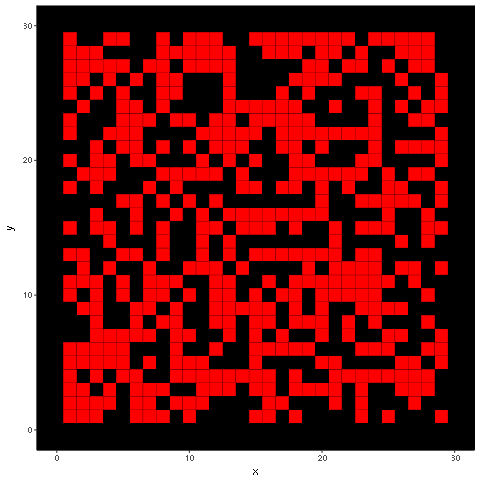

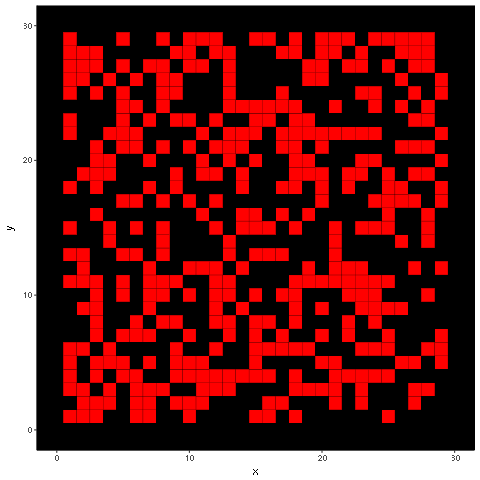

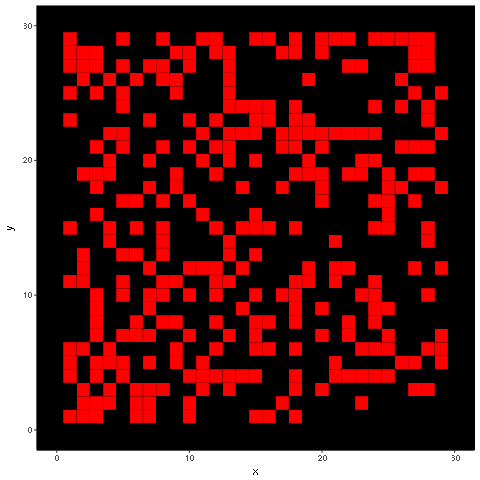

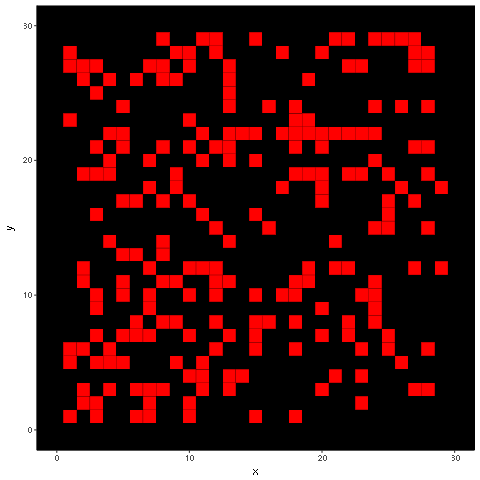

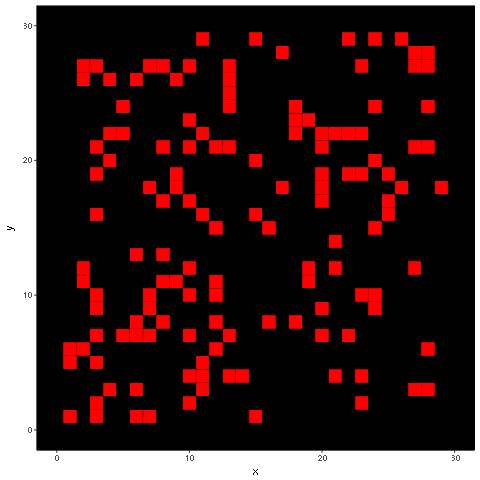

In [52]:
%%R

plotPerturbation("./data/heatmap_N_961_strat_random_graph_lattice_STEP_0.01_SEED_20123.csv")

# Lattice Graph, Localized Perturbation

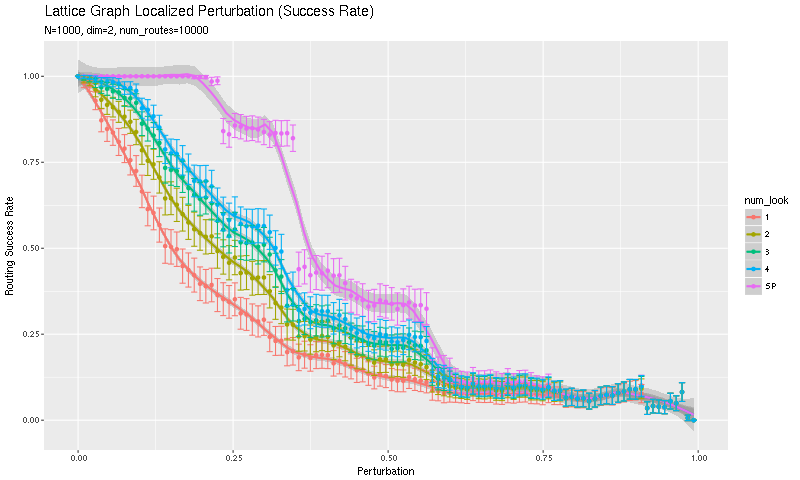

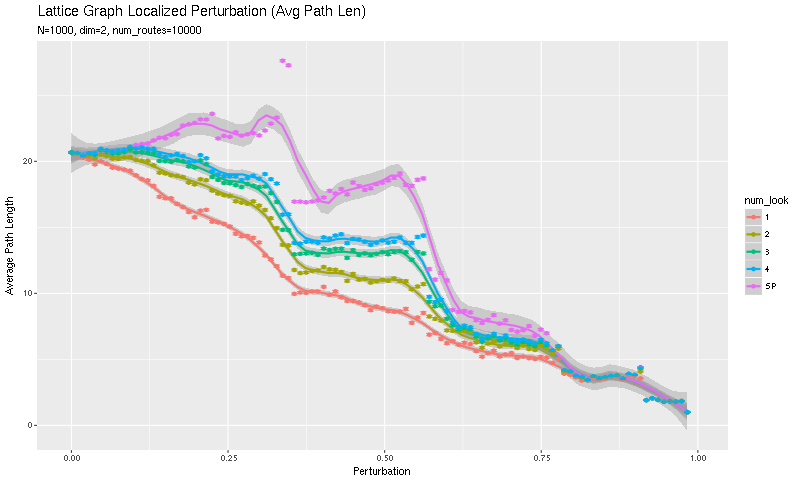

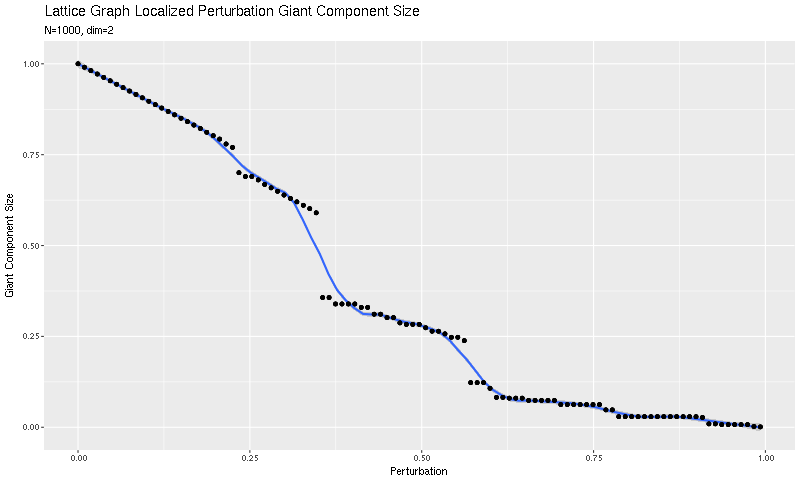

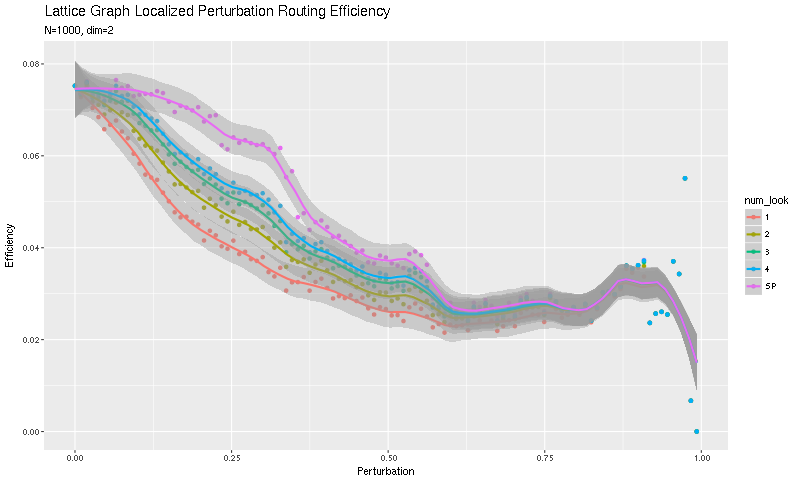

In [54]:
%%R -w 800

library(readr)

df <- read_csv("./data/N_961_strat_localized_STEP_0.01_graph_lattice_numroutes_10000_dim_2_k_50_numlookahead_5_rand_26630.csv")
df$num_look <- factor(df$num_look)
library(ggplot2)

print(ggplot(df, aes(x=f, y=succ_rate, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=succ_rate-succ_std, ymax=succ_rate+succ_std),
                  width=.01) + 
    labs(title="Lattice Graph Localized Perturbation (Success Rate)",
         subtitle="N=1000, dim=2, num_routes=10000", x="Perturbation", y="Routing Success Rate"))

print(ggplot(df, aes(x=f, y=avg_len, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=avg_len-avg_std_dev, ymax=avg_len+avg_std_dev),
                  width=.01) + 
    labs(title="Lattice Graph Localized Perturbation (Avg Path Len)", subtitle="N=1000, dim=2, num_routes=10000",
         x="Perturbation", y="Average Path Length"))

print(ggplot(df, aes(x=f, y=giant_comp_size)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Localized Perturbation Giant Component Size", subtitle="N=1000, dim=2",
         x="Perturbation", y="Giant Component Size"))

ggplot(df, aes(x=f, y=avg_efficiency, color=num_look)) +  geom_point()+ geom_smooth(span=.2) + 
    labs(title="Lattice Graph Localized Perturbation Routing Efficiency", subtitle="N=1000, dim=2",
         x="Perturbation", y="Efficiency")


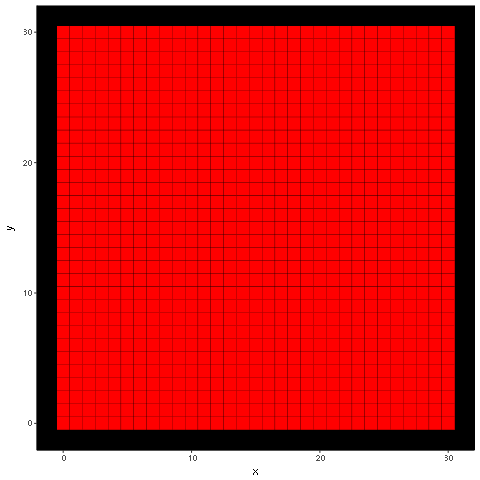

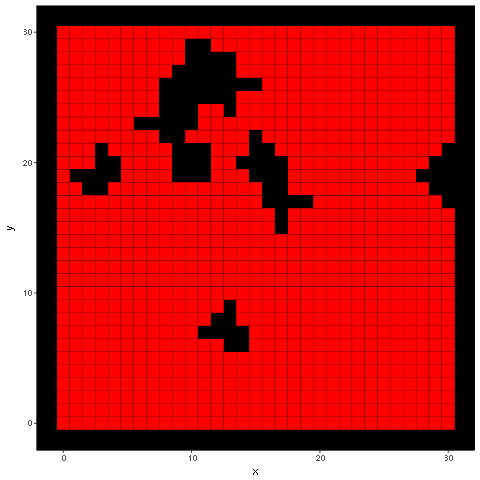

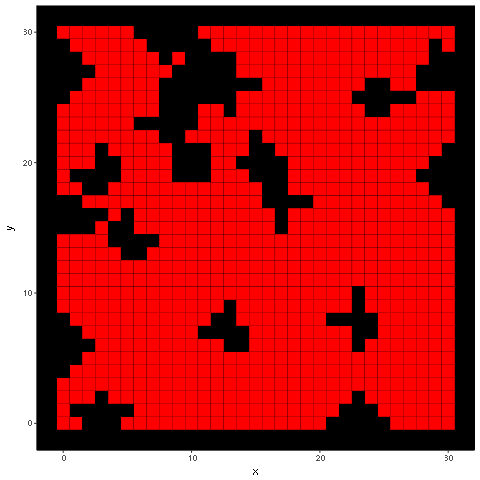

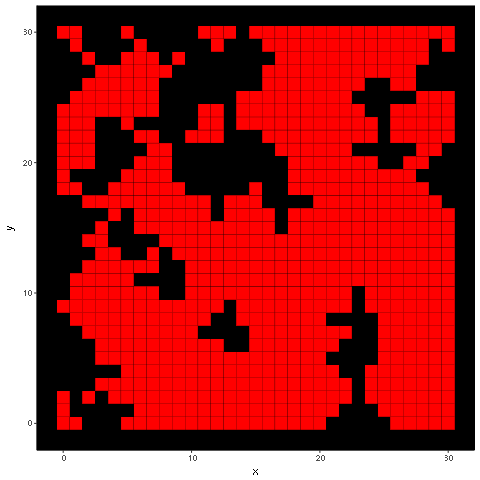

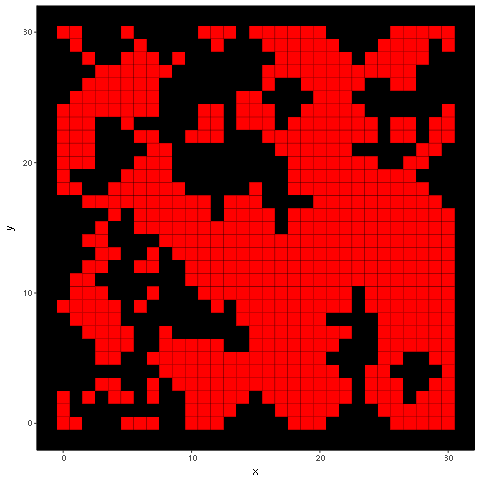

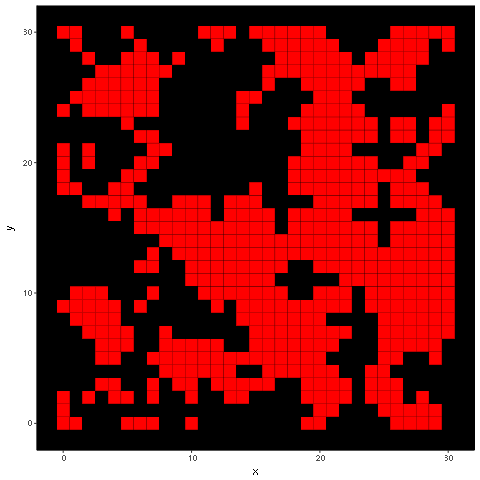

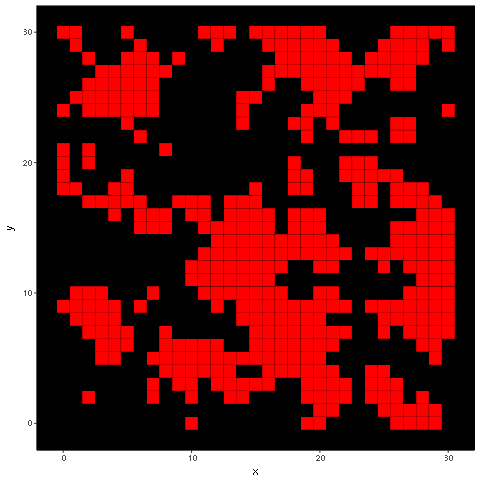

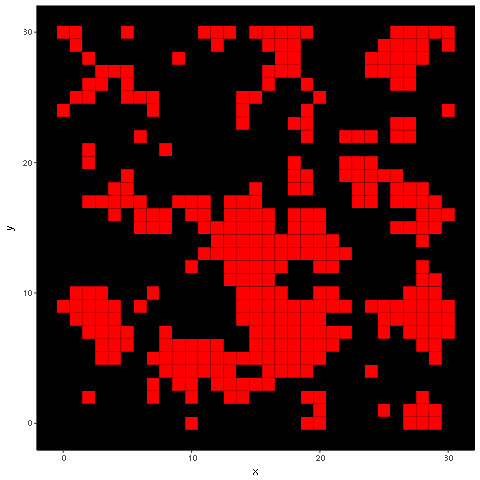

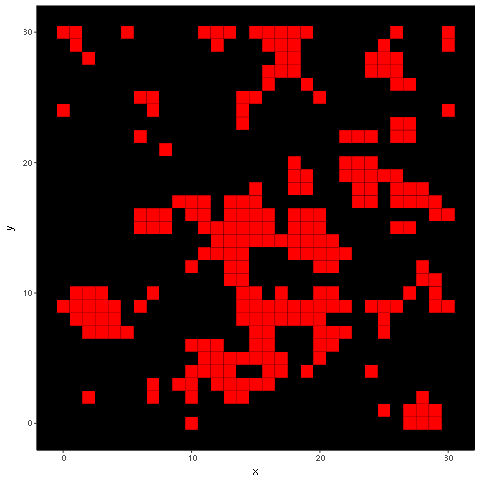

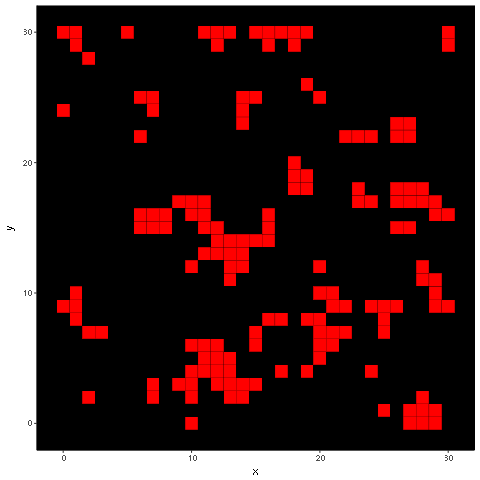

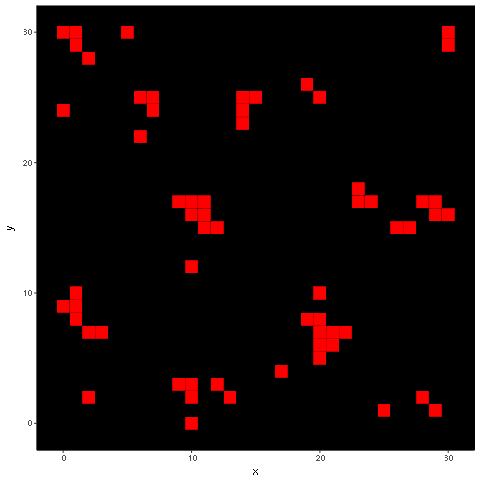

In [34]:
%%R

plotPerturbation("./data/heatmap_N_961_strat_localized_graph_lattice_STEP_0.01_SEED_6306.csv")

## Localized (Expanding Hole from Center)

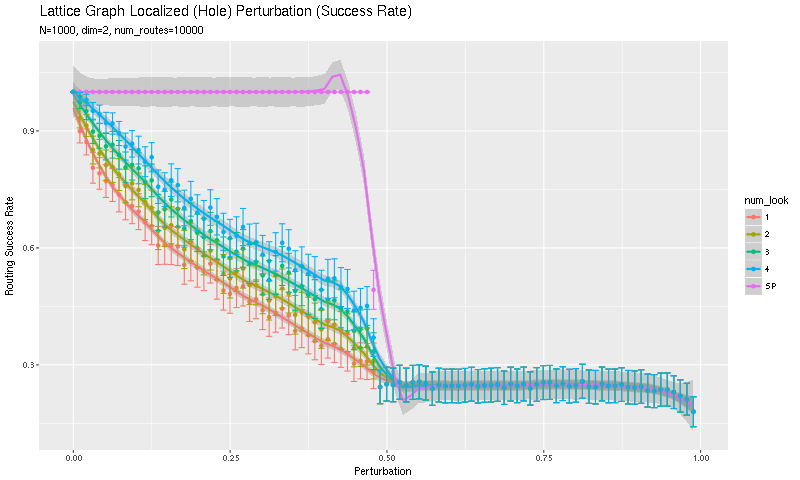

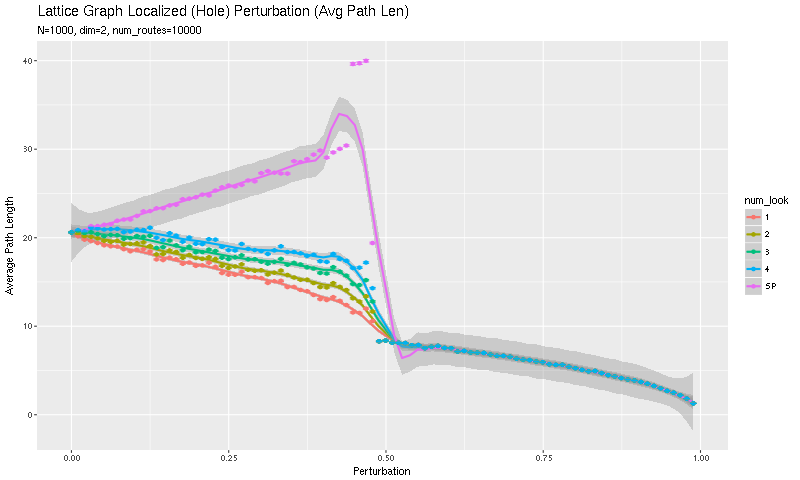

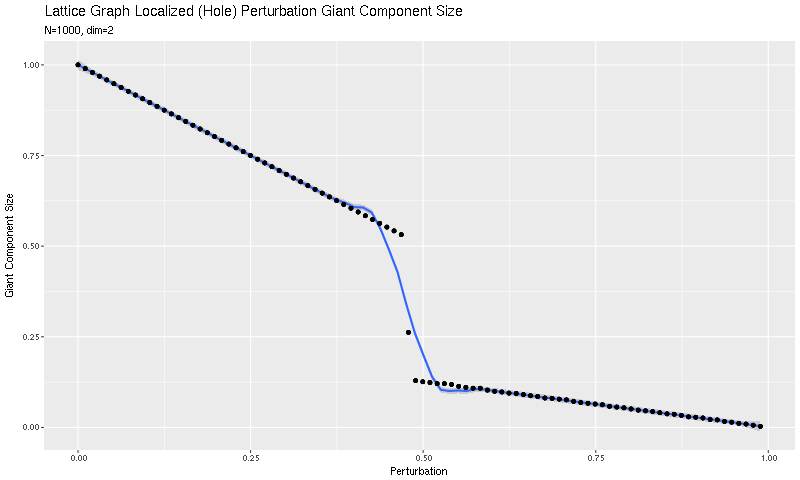

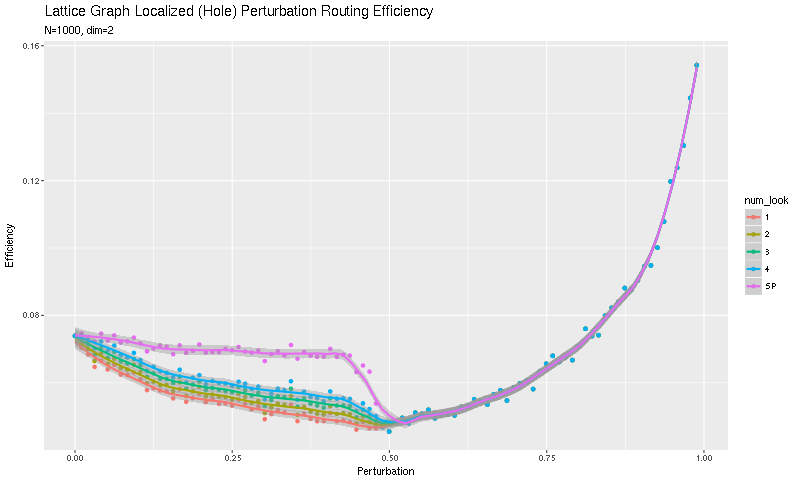

In [38]:
%%R -w 800

library(readr)

df <- read_csv("./data/N_961_strat_localized_expanding_hole_STEP_0.01_graph_lattice_numroutes_10000_dim_2_k_50_numlookahead_5_rand_28006.csv")
df$num_look <- factor(df$num_look)
library(ggplot2)

print(ggplot(df, aes(x=f, y=succ_rate, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=succ_rate-succ_std, ymax=succ_rate+succ_std),
                  width=.01) + 
    labs(title="Lattice Graph Localized (Hole) Perturbation (Success Rate)",
         subtitle="N=1000, dim=2, num_routes=10000", x="Perturbation", y="Routing Success Rate"))

print(ggplot(df, aes(x=f, y=avg_len, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=avg_len-avg_std_dev, ymax=avg_len+avg_std_dev),
                  width=.01) + 
    labs(title="Lattice Graph Localized (Hole) Perturbation (Avg Path Len)", subtitle="N=1000, dim=2, num_routes=10000",
         x="Perturbation", y="Average Path Length"))

print(ggplot(df, aes(x=f, y=giant_comp_size)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Localized (Hole) Perturbation Giant Component Size", subtitle="N=1000, dim=2",
         x="Perturbation", y="Giant Component Size"))

ggplot(df, aes(x=f, y=avg_efficiency, color=num_look)) +  geom_point()+ geom_smooth(span=.2) + 
    labs(title="Lattice Graph Localized (Hole) Perturbation Routing Efficiency", subtitle="N=1000, dim=2",
         x="Perturbation", y="Efficiency")

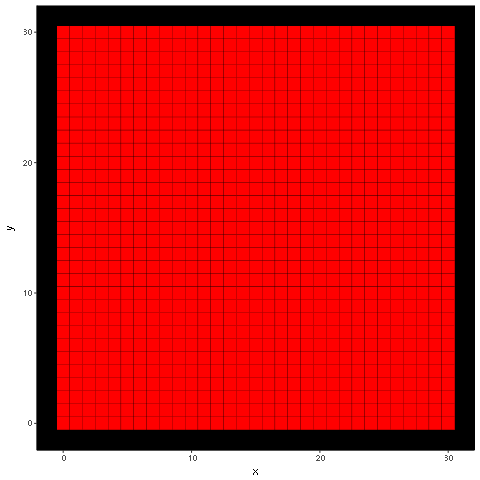

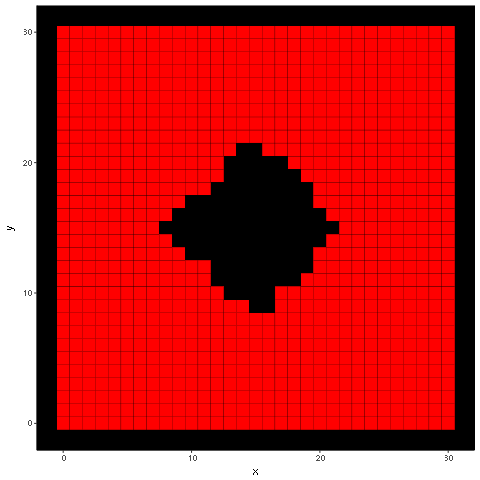

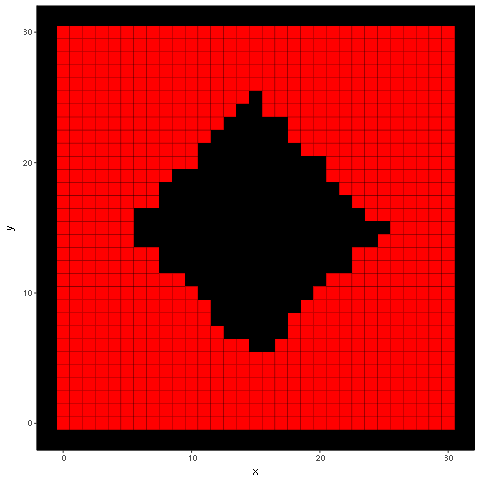

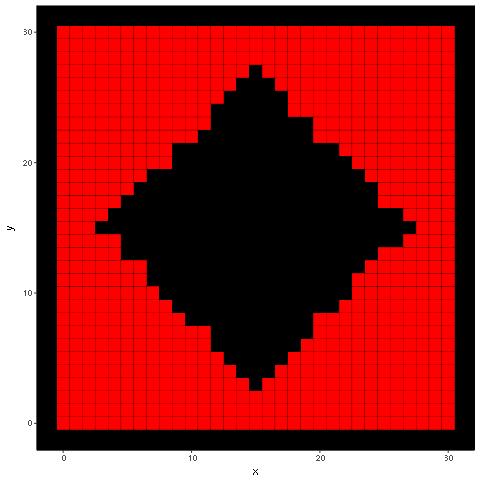

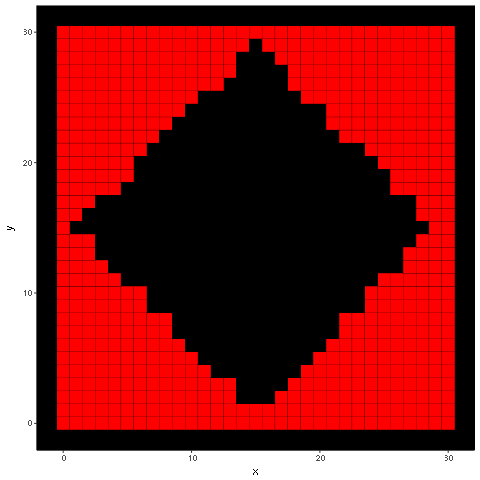

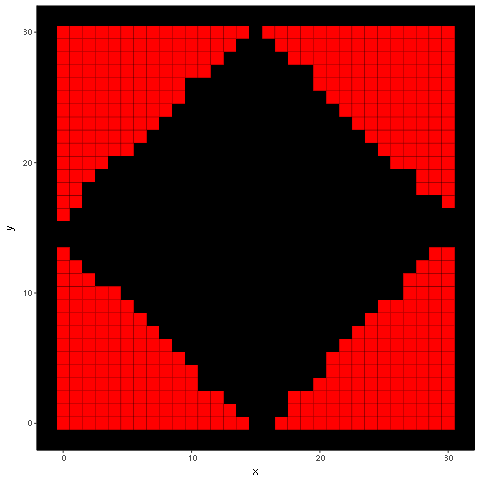

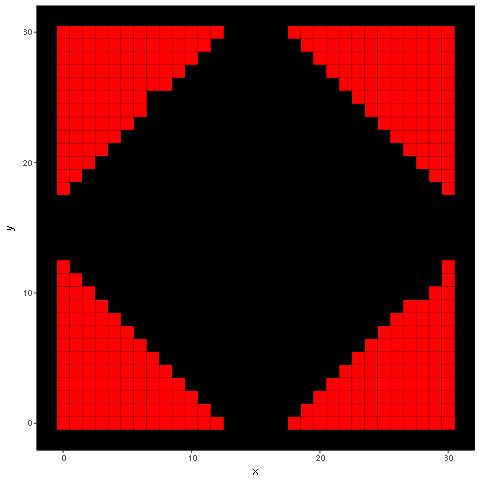

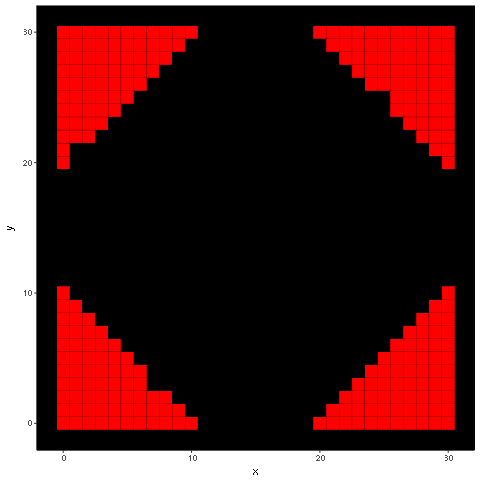

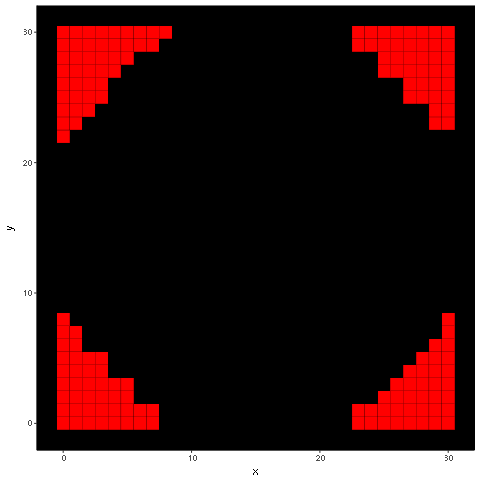

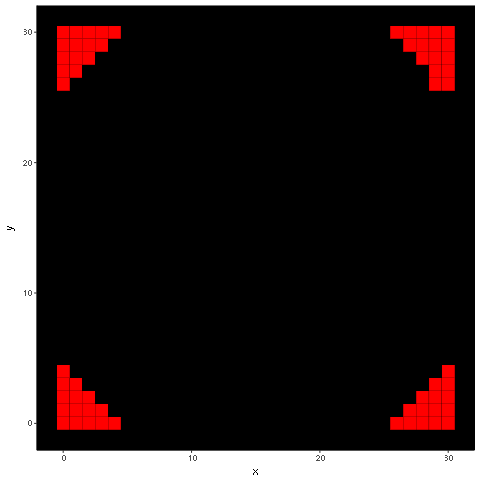

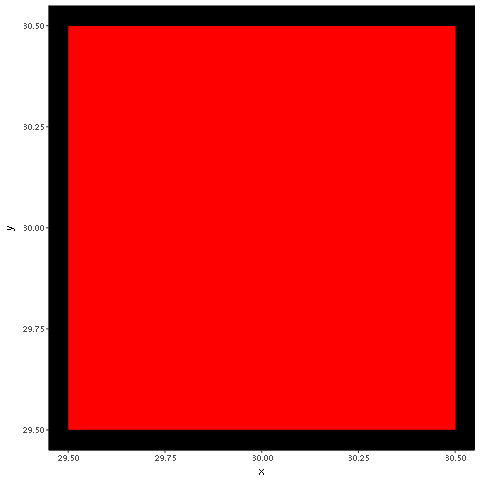

In [39]:
%%R

plotPerturbation("./data/heatmap_N_961_strat_localized_expanding_hole_graph_lattice_STEP_0.01_SEED_28006.csv")

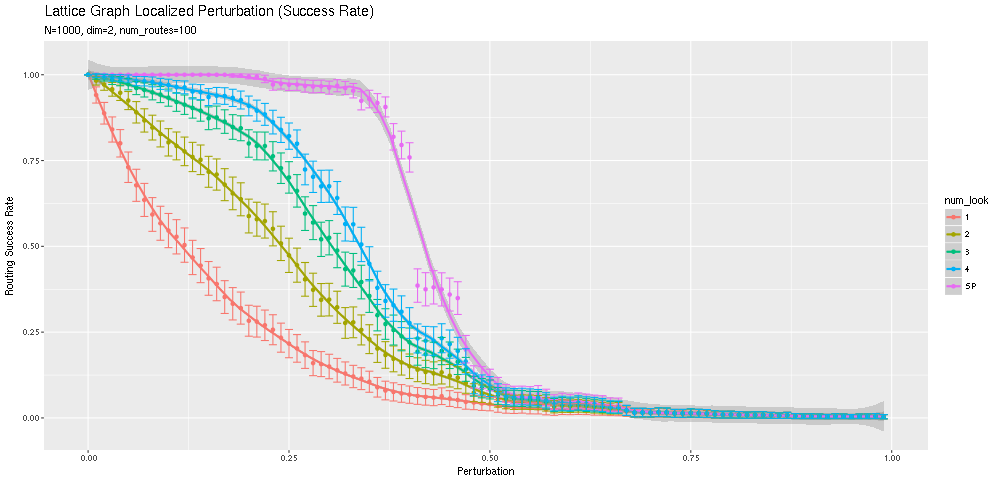

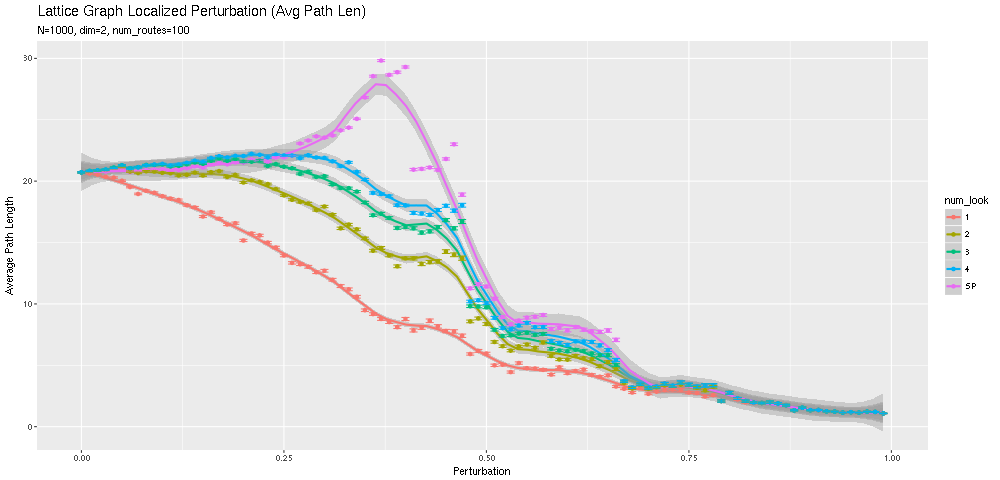

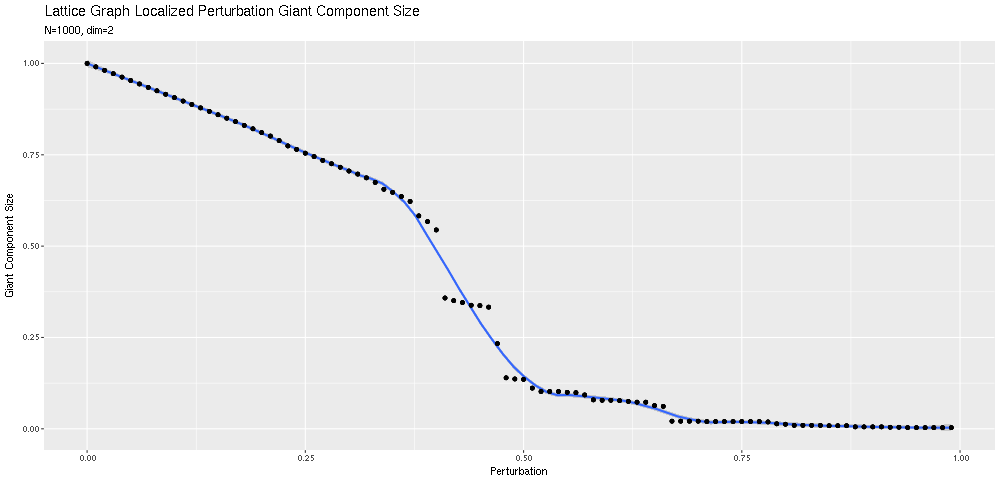

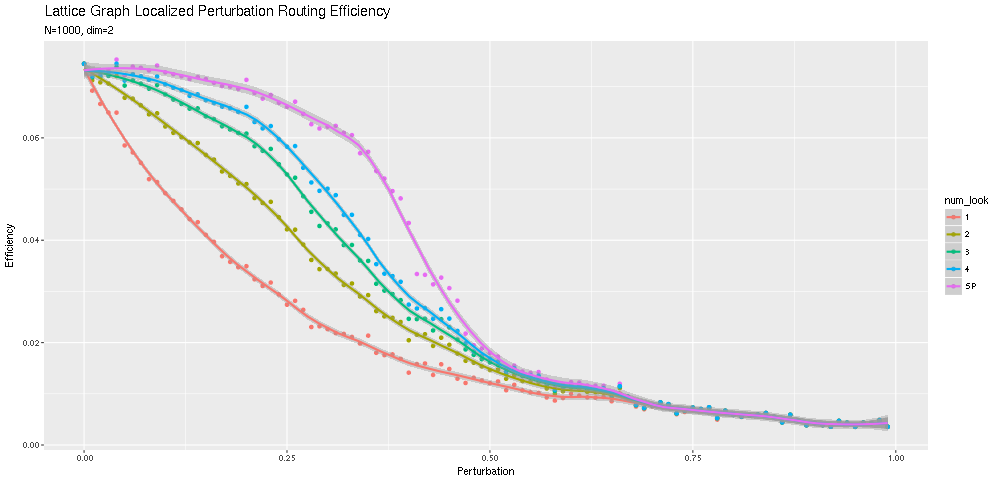

In [46]:
%%R -w 1000
library(readr)

df <- read_csv("./data/N_961_strat_random_STEP_0.01_graph_lattice_numroutes_10000_dim_2_k_50_numlookahead_5_rand_21556.csv")
df$num_look <- factor(df$num_look)
library(ggplot2)

print(ggplot(df, aes(x=f, y=succ_rate, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=succ_rate-succ_std, ymax=succ_rate+succ_std),
                  width=.01) + 
    labs(title="Lattice Graph Localized Perturbation (Success Rate)",
         subtitle="N=1000, dim=2, num_routes=100", x="Perturbation", y="Routing Success Rate"))

print(ggplot(df, aes(x=f, y=avg_len, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=avg_len-avg_std_dev, ymax=avg_len+avg_std_dev),
                  width=.01) + 
    labs(title="Lattice Graph Localized Perturbation (Avg Path Len)", subtitle="N=1000, dim=2, num_routes=100",
         x="Perturbation", y="Average Path Length"))

print(ggplot(df, aes(x=f, y=giant_comp_size)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Localized Perturbation Giant Component Size", subtitle="N=1000, dim=2",
         x="Perturbation", y="Giant Component Size"))

ggplot(df, aes(x=f, y=avg_efficiency, color=num_look)) +  geom_point()+ geom_smooth(span=.2) + 
    labs(title="Lattice Graph Localized Perturbation Routing Efficiency", subtitle="N=1000, dim=2",
         x="Perturbation", y="Efficiency")

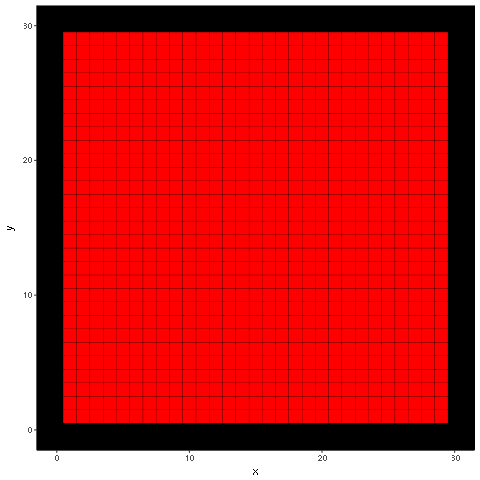

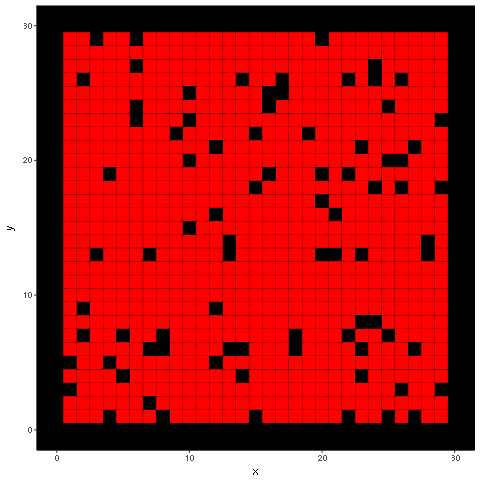

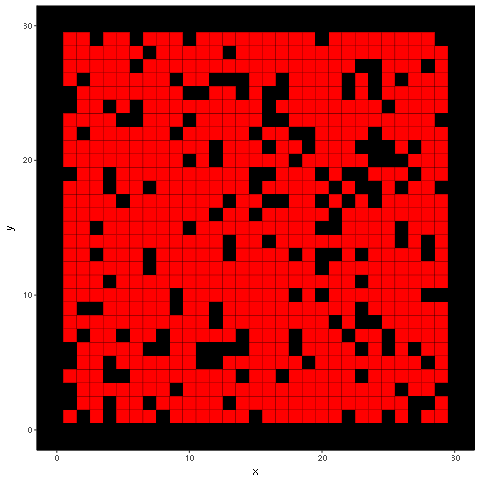

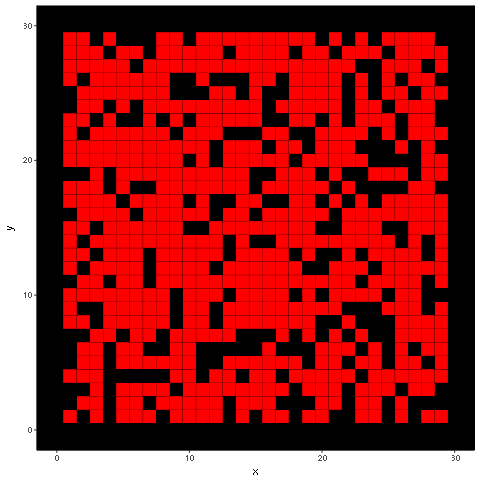

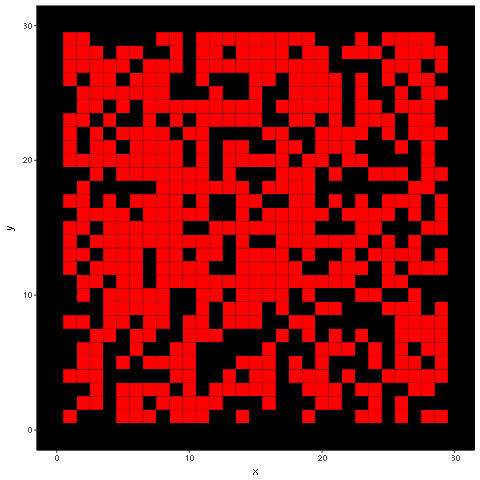

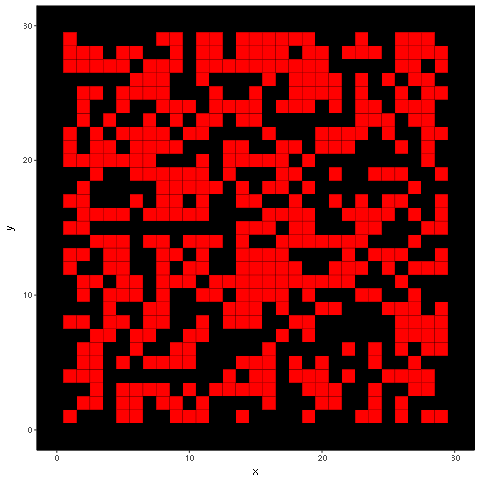

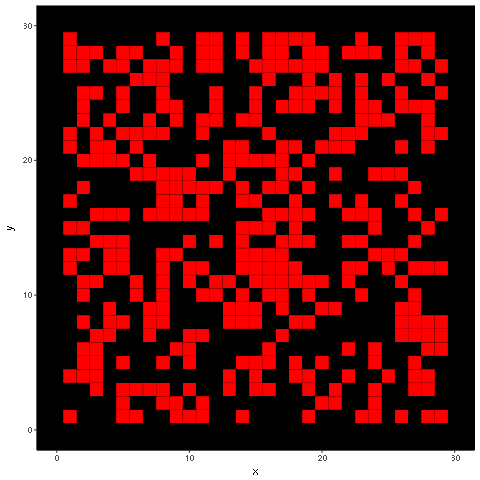

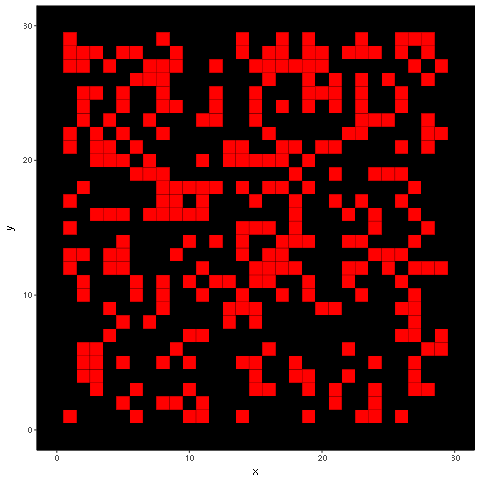

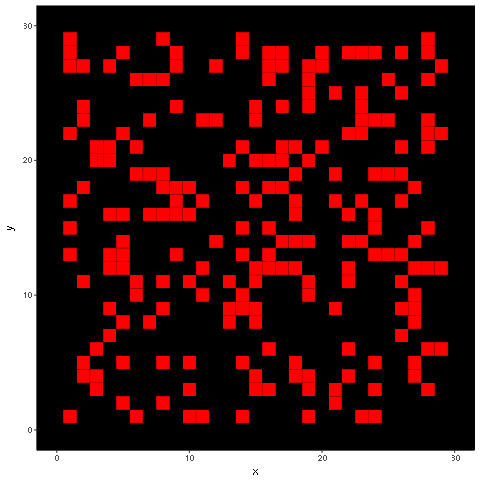

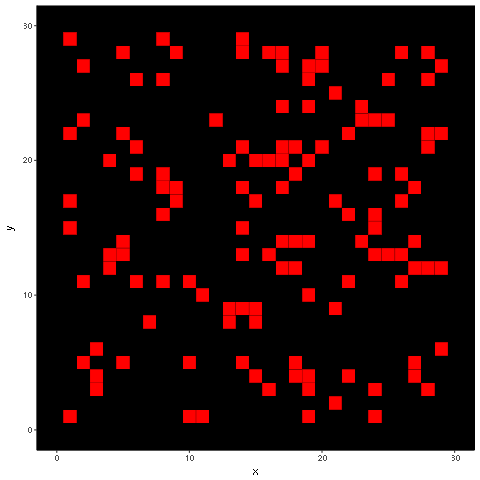

In [47]:
%%R
plotPerturbation("./data/heatmap_N_961_strat_random_graph_lattice_STEP_0.01_SEED_30441.csv")

# A tibble: 4,778 x 3
   `(10, 9)` `349`   `0`
   <chr>     <int> <int>
 1 (9, 9)      310     0
 2 (8, 9)      309     0
 3 (7, 9)      296     0
 4 (6, 9)      256     0
 5 (5, 9)      187     0
 6 (5, 10)     223     0
 7 (5, 11)     236     0
 8 (4, 11)     218     0
 9 (4, 12)     232     0
10 (4, 13)     235     0
# ... with 4,768 more rows


## Notes April 13

Random sample of src, dest (maybe special characteristics), route with SP, k=1, ..., 5

Mostly unperturbed graphs, and also slightly perturbed graphs (I think very perturbed graphs won't be helpful)

Try to catch test cases where the different routing algos perform differently